# Analysing Traffic Accidents in 49 States, from 2016-2020

### Pre-processing

In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Basic EDA

In [2]:
#Import data and analyze
data = r'/Users/OliverPan/Desktop/accidents.csv'

In [3]:
us_accidents = pd.read_csv(data)

In [4]:
us_accidents.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
#Check columns
us_accidents.columns.values

array(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype=object)

### Countplot of accidents from 2016-2020 per day

In [6]:
daily = us_accidents[["Start_Time", "ID"]]

In [7]:
#Change Start_Time to just date
daily["Start_Time"] = pd.to_datetime(daily["Start_Time"])
daily["Start_Time"] = daily["Start_Time"].dt.date

/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#Count number of accidents per date
months_count = daily.groupby(["Start_Time"])["ID"].count().to_frame().reset_index()

Text(0, 0.5, 'Number of Accidents')

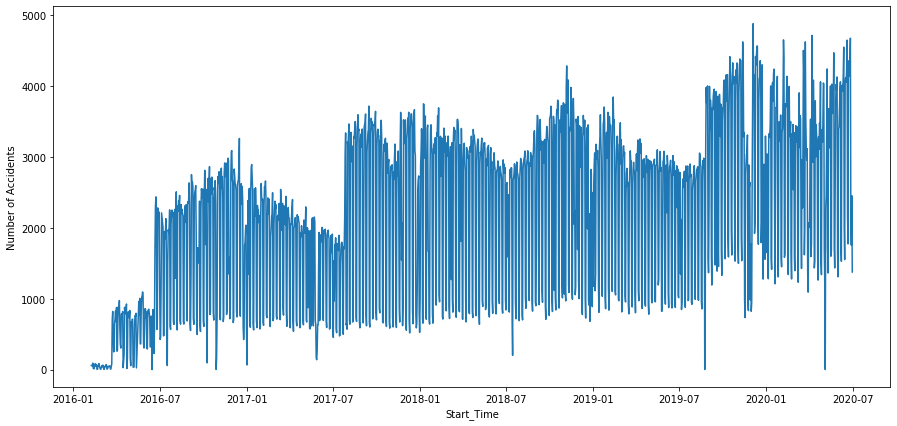

In [9]:
plt.figure(figsize=(15,7))
sns.lineplot(x = months_count["Start_Time"], y = months_count["ID"])
plt.ylabel("Number of Accidents")

### Countplot of accidents from 2016-2020 per week

In [10]:
weekly = us_accidents[["Start_Time", "ID"]]

In [11]:
#Change Start_Time to just date
weekly["Start_Time"] = pd.to_datetime(weekly["Start_Time"])
weekly["Start_Time"] = weekly["Start_Time"].dt.to_period('W-Sun')
weekly["Start_Time"] = weekly["Start_Time"].astype(str).str.slice(0, 10)
weekly["Start_Time"] = pd.to_datetime(weekly["Start_Time"])

/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/OliverPan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [12]:
#Count number of accidents per date
week_count = weekly.groupby(["Start_Time"])["ID"].count().to_frame().reset_index()

Text(0, 0.5, 'Number of Accidents')

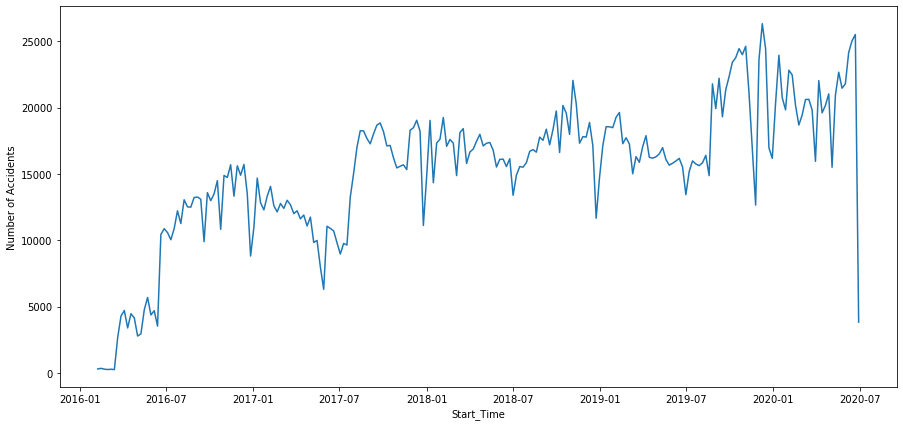

In [13]:
plt.figure(figsize=(15,7))
sns.lineplot(x = week_count["Start_Time"], y = week_count["ID"])
plt.ylabel("Number of Accidents")

#### It is easier to see from a weekly perspective, but we can justify that the number of accidents are increasing

### Plot to see volume of accidents

In [36]:
df = us_accidents[["Start_Lng", "Start_Lat"]]
df.columns = ["longitude", "latitude"]

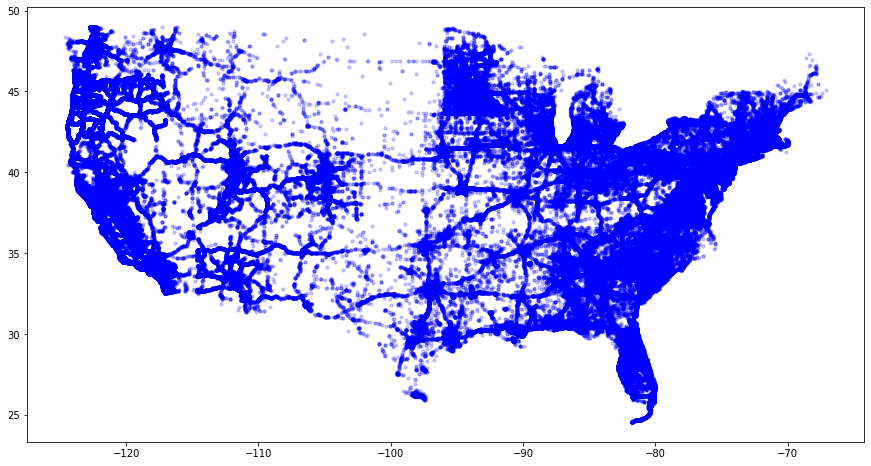

In [46]:
fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='b', s=10)